# 1. Introduction

Le but de ce projet est de modéliser le mouvement d'un satellite autour d'une planète en utilisant Python qui est un language informatique nous permettant de laisser à l'ordinateur la longue tâche de calculer les positions de l'objet.

# 2. Développement

Il nous faut tout d'abord trouver les équations de position qui nous permettront d'évaluer la position approximativement.

Pour ceci on se place alors dans un repère avec la planète en son origine ${(0,0)}$ et le sattelite à sa position initiale sur l'axe des abscisses à une distance x de la planète.

Après un certain temps ${t}$ le sattelite se sera déplacé et sera maintenant à une nouvelle position ${(x,y)}$. L'unique force qui agit sur le sattelite est alors l'attraction gravitationnelle par la planète: $\frac{G\cdot M_{P}\cdot m_{s}}{r^2}$ où ${G}$ est la constante gravitationnelle, ${M_{P}}$ la masse de la planète, ${m_{s}}$ la masse du sattelite et ${r}$ la distance entre le sattelite et la planète. Dans notre cas ${r}$ est égal à $\sqrt{x^2 + y^2}$. 

Nous allons maintenant projetter ce vecteur force agissant sur le sattelite en ${(x,y)}$ sur les axes des abscisses et des ordonnées pour en avoir les deux composantes. On va faire appel à la trigonométrie dans les deux cas car on a affaire à une situation dans laquelle il nous faut trouver un côté d'un triangle rectangle an connaissant l'hypothénuse. 

Donc, on obtient, $$\frac{-\cos{\theta}\cdot G \cdot M_{P} \cdot m_{s}}{x^2 + y^2}$$ pour la projection sur l'axe X et $$\frac{-\sin{\theta}\cdot G \cdot M_{P} \cdot m_{s}}{x^2 + y^2}$$ pour la projection sur l'axe Y avec $\theta$ qui est l'angle à l'origine.

Nous pouvons aussi exprimer $\cos {\theta}$ et $\sin {\theta}$ en termes de x et de y. En effet, $$\cos{\theta} = \frac{x}{\sqrt{x^2 + y^2}}$$ et $$\sin{\theta} = \frac{y}{\sqrt{x^2 + y^2}}$$

Selon le principe fondamental de la dynamique de Newton, cette force doit être égale à la masse du sattelite multipliée par son accélération ${m_s}\cdot{a_s}$. On peut alors écrire: $${m_s}\cdot{\frac{d^2 x}{dt^2}} = -\frac{x}{\sqrt{x^2 + y^2}}\cdot \frac{G \cdot M_{P} \cdot m_{s}}{x^2 + y^2}$$ $${m_s}\cdot{\frac{d^2 y}{dt^2}} = -\frac{y}{\sqrt{x^2 + y^2}}\cdot \frac{G \cdot M_{P} \cdot m_{s}}{x^2 + y^2}$$

En simplifiant les masses des sattelites on obtient: $$\frac{d^2 x}{dt^2} = -\frac{G\cdot M_{P}\cdot x}{\sqrt{(x^2 + y^2)^3}}$$ $$\frac{d^2 y}{dt^2} = -\frac{G\cdot M_{P}\cdot y}{\sqrt{(x^2 + y^2)^3}}$$

Pour résoudre ces équations différentielles et donc obtenir la trajectoire du sattelite nous allons utiliser une méthode d'approximation numérique, la méthode d'Euler. Cette méthode nous dit que si nous connaissons la vitesse initiale au temps $t$ alors la vitesse au temps $t + dt$ est égale à $v(t) + a(t)dt$ et la position $x$ au temps $t + dt$ est égale à $x(t) + v(t)dt$. Le même raisonnement s'applique pour la position en $y$. De plus nous pouvons trouver l'accélération grâce aux équations que nous avons trouver au dessus. 

# 3. Codage

Dans la première partie du code il nous faudra importer les modules que nous allons utiliser par la suite. Numpy pour avoir accès aux vecteurs avec lesquels on gardera les positions en mémoire au fur et à mesure de nos calculs, Math pour les opérateurs mathématiques nottament les racines carrées et Matplotlib.pyplot pour la représentation graphique de nos résultats.   

In [20]:
import math
import numpy as np
import matplotlib.pyplot as pyplot

Puis nous allons introduire les différents paramètres que nous allons utiliser lors des calculs.

In [21]:
GM = 1 #constante gravitationnelle * masse planète
dt = 0.001 #pas de temps
vx = 0 #vitesse initiale en x
vy = 1.63 #vitesse initiale en y
x = 0.5 #x à l'origine
y = 0 #y à l'origine
e = 4500 #nombre d'étapes

Nous avons choisi des petites valeurs avec lesquelles il est facile de travailler mais nous aurions pu choisir des valeurs plus réalistes ce que nous allons faire plus tard pour vérifier le code en l'appliquant à une orbite géostationnaire. Cependant, le choix des paramètres est un moment crucial car un mauvais choix ne donnera pas de résultat convaincant. Par exemple, si on choisit un $GM_{P}$ assez grand comme celui de la Terre qui est de $4 \cdot 10^{14}$ mais qu'on met un $x$ petit comme $0.5$ il est impossible que le code marche car cela reviendrait à essayer de faire orbiter un objet à $0.5$ mètres de la Terre. Un autre faute possible est d'avoir un pas de temps trop petit et un petit nombre d'étapes ce qui résulterait dans le fait que le code ne génèrerait qu'une fraction de la trajectoire qui peut être une parabole ou même une droite alors qu'on espère obtenir une ellipse.   

Comme dit auparavant nous allons stocker les positions obtenues dans des vecteurs que nous devons alors générer.

In [22]:
X = np.empty(e)
Y = np.empty(e)
T = np.linspace(0,e-2,e-1)

X et Y correspondent à des vecteurs dont le nombre de cases est le même que le nombre d'étapes et chacune est vide. T est un vecteurs représentant les temps auxquels nous alons faire nos calculs. 

In [23]:
X[0]=x
Y[0]=y

Ce petit bout de code introduit les valeurs initiales de x et de y dans leurs vecteurs correspondant.

In [24]:
for i in T:
  ax = ((-GM)*x)/((math.sqrt(x**2+y**2))**3)
  ay = ((-GM)*y)/((math.sqrt(x**2+y**2))**3)
  vx = vx+ax*dt
  vy = vy+ay*dt
  x = x + vx*dt
  y = y + vy*dt
  X[int(i)+1]=x
  Y[int(i)+1]=y

Cette boucle est au coeur de notre programme, c'est elle qui calcule les positions en x et en y. Nous allons donc l'analyser ligne par ligne. 

Tout d'abord, "for i in T:" introduit la boucle et fait tourner i sur toutes les $e - 1$ valeurs de 0 à $e - 2$ de T.

Puis, ax et ay sont les accélérations en x et en y que on actualise à chaque étape de la boucle sur base des valeurs de x et de y trouvées à l'étape précédente ou sur base des valeurs initiales pour la première étape. 

Les expressions de vx et de vy permettent d'actualiser ces paramètres en fonction de la vitesse à l'étape précédente et de l'accélération. 

Finalement, les expressions de x et de y actualisent ces valeurs des positions en fonction des positions précédentes et des valeurs de vx et vy. 

"$X[int(i)+1]=x$" et "$Y[int(i)+1]=y$" permettent de placer les valeurs de x et de y à leur emplacement dans les vecteurs de position X et Y sans changer la valeur initiale que l'on a déja placée au début.

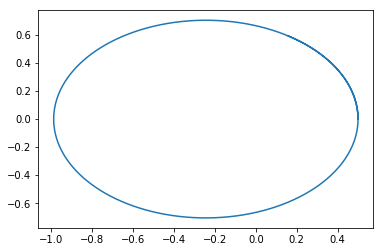

In [27]:
x = X
y = Y
pyplot.plot(x,y)
pyplot.savefig('orbite.pdf')

Ce code génère la représentation graphique à partir des vecteurs X et Y. En repérant les valeurs de X sur l'axe des abscisses et les valeurs de Y sur l'axe des ordonnées.

# 4. Vérification

Il faut maintenant vérifier le code que nous avons créé une des manières de le faire est d'introduire des valeurs réelles dont on connaît le résultat et voir si on obtient la même chose avec le code. A ce but nous allons essayer de retracer la trajectoire d'un sattelite géostationnaire qui orbite autour de la Terre à une altitude de 42 162 140 mètres et à une vitesse de 3074.5 m/s. En entrant ces données dans le code avec le $GM_{P}$ de la Terre, un pas de temps de une seconde et un nombre d'étapes de 85539, on obtient le résultat suivant.

In [11]:
import math
import numpy as np
import matplotlib.pyplot as pyplot

GM = 4*10**14 #constante gravitationnelle * masse planète
dt = 1 #pas de temps
vx = 0 #vitesse initiale en x
vy = 3074.5 #vitesse initiale en y
x = 42162140 #x à l'origine
y = 0 #y à l'origine
e = 85539 #nombre d'étapes

T = np.linspace(0,e-2,e-1)
X = np.empty(e)
Y = np.empty(e)

X[0]=x
Y[0]=y

for i in T:
  ax = ((-GM)*x)/((math.sqrt(x**2+y**2))**3)
  ay = ((-GM)*y)/((math.sqrt(x**2+y**2))**3)
  vx = vx+ax*dt
  vy = vy+ay*dt
  x = x + vx*dt
  y = y + vy*dt
  X[int(i)+1]=x
  Y[int(i)+1]=y

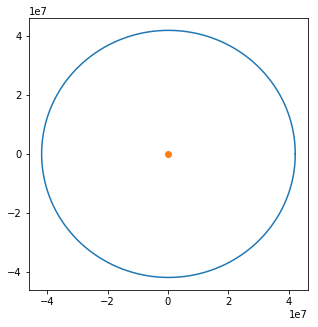

In [14]:
x = X
y = Y
fig = pyplot.figure(figsize=(5,5))
pyplot.plot(x,y)
pyplot.plot(0,0,'o')
pyplot.savefig('orbite.pdf')

A premier abord, cette forme semble être une ellipse mais ce n'est qu'une illusion d'optique car les échelles des axes ne sont pas égales, en réalité il s'agit d'un cercle ce qui est ce que nous recherchons car la trajectoire d'un sattelite géostationnaire est parfaitement circulaire. De plus, la période d'un sattelite géostationnaire est de 86164 secondes ce qui équivaut parfaitement à la durée d'une journée. Pour calculer la période de notre orbite nous regardons à quelle étape notre trajectoire passe par y = 0. Puisqu'on a commencé à y = 0 la longueur trouvée correspondra à la longueur d'une orbite. On trouve que à l'étape 85538 y est négatif mais à l'étape 85539 il est positif. On peut donc dire que la durée de l'orbite se situe entre 85538 et 85539 secondes ce qui nous donne une différence de 625 secondes ou 10,4 minutes par rapport au résultat attendu. Au plus on choisi un petit pas au plus le résultat sera précis mais les calculations seront plus longues.

La méthode que nous avons utilisée dans le code n'est cependant pas la méthode d'Euler exacte, en effet dufait de l'ordre du calcul de l'accélération, la vitesse et de la position, le calcul de position n'est pas $x(t+dt) = x(t) + v(t) \cdot dt$ mais $x(t+dt) = x(t) + v(t+dt) \cdot dt$ ce qui peut s'écrire $x(t) + v(t)\cdot dt + a(t)\cdot dt^2$. La position exacte étant évaluée par $x(t) + v(t)\cdot dt + \frac{1}{2} \cdot a(t)\cdot dt^2$ il serait logique que les deux calculs donnent un résultat qui ait la même erreur car les deux méthodes ont la même différence de $\frac{1}{2}\cdot a(t)$ avec la méthode exacte. Nous allons maintenant montrer le résultat en utilisant le code avec la méthode Eulérienne.  

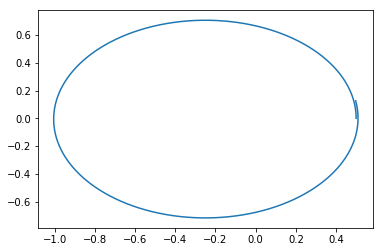

In [28]:
import math
import numpy as np
import matplotlib.pyplot as pyplot

GM = 1 #constante gravitationnelle * masse planète
dt = 0.001 #pas de temps
vx = 0 #vitesse initiale en x
vy = 1.63 #vitesse initiale en y
x = 0.5 #x à l'origine
y = 0 #y à l'origine
e = 4200 #nombre d'étapes
ax = -4
ay = 0

T = np.linspace(0,e-2,e-1)
X = np.empty(e)
Y = np.empty(e)

X[0]=x
Y[0]=y

for i in T:
  ax = ((-GM)*x)/((math.sqrt(x**2+y**2))**3)
  ay = ((-GM)*y)/((math.sqrt(x**2+y**2))**3)
  x = x + vx*dt
  y = y + vy*dt
  vx = vx+ax*dt
  vy = vy+ay*dt
  X[int(i)+1]=x
  Y[int(i)+1]=y

x = X
y = Y
pyplot.plot(x,y)
pyplot.savefig('orbite.pdf')

On voit clairement que l'erreur est plus importante avec cette méthode que avec la première méthode utilisée ce qui est curieux car logiquement elle devrait être la même.